Correlation Analysis (Mushrooms.csv)

In [ ]:
#pip installs
!pip install xlsxwriter
!pip install xlwt

     |████████████████████████████████| 149 kB 10.0 MB/s 


In [ ]:
#Imports
from scipy.stats import spearmanr
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as py
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

# prepare data
shrooms = pd.read_csv('mushrooms.csv')
display(shrooms.head())
fixeddata = shrooms.apply(preprocessing.LabelEncoder().fit_transform)
display(fixeddata.head())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


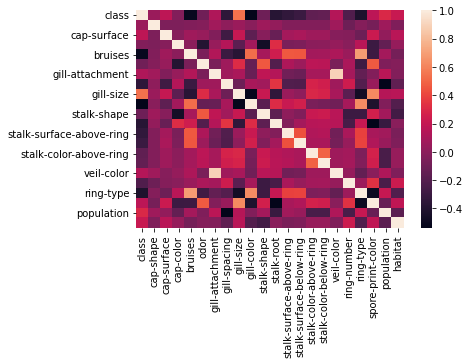

In [ ]:
cdata = fixeddata.copy()
cdata = cdata.drop(columns=['veil-type'])
display(cdata.head())
correlations = cdata.corr()
sns.heatmap(correlations)
plt.show()

In [ ]:
#As seen, most useful features are:

#Negative: cap-color, gill-spacing, gill-color, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring,
# ring-number, ring-type. 

#Positive: population, gill-size.

#Irrelevant: cap-shape,	cap-surface, bruises, odor, gill-attachment,	stalk-shape, 	stalk-color-above-ring,
#	stalk-color-below-ring, veil-color,	spore-print-color, habitat, class

new_cdata = cdata.drop(columns=['cap-shape','cap-surface', 'bruises', 'odor', 'gill-attachment',	'stalk-shape',
                            'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
                            'spore-print-color', 'habitat'])
display(new_cdata.head())

,class,cap-color,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-number,ring-type,population
0,1,4,0,1,4,3,2,2,1,4,3
1,0,9,0,0,4,2,2,2,1,4,2
2,0,8,0,0,5,2,2,2,1,4,2
3,1,8,0,1,5,3,2,2,1,4,3
4,0,3,1,0,4,3,2,2,1,0,0


In [ ]:
#Separate Data and write to excel:

writer = pd.ExcelWriter('Data.xlsx', engine='xlsxwriter')
x = pd.DataFrame(new_cdata.iloc[:,1:11])
y = pd.DataFrame(new_cdata['class'])

# set aside 20% of train and test data for evaluation
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state= 8)

print(y_train)

# Create data sets
train = X_train.copy()
train.insert(0, "Edible", y_train["class"], True)
test = X_test.copy()
test.insert(0, "Edible", y_test["class"], True)
validation = X_val.copy()
validation.insert(0, "Edible", y_val["class"], True)

# Create excel sheet
train.to_excel(writer, sheet_name='Train')
test.to_excel(writer, sheet_name='Test')
validation.to_excel(writer, sheet_name='Validation')
writer.save()

#with pd.ExcelWriter('two_frames_one_tab.xlsx', engine='xlsxwriter') as writer:
 #   train.to_excel(writer, sheet_name='first_tab', index=False)
  #  test.to_excel(writer, sheet_name='second_tab', index=False) 

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_test.shape))

,cap-color,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-number,ring-type,population
0,4,0,1,4,3,2,2,1,4,3
1,9,0,0,4,2,2,2,1,4,2
2,8,0,0,5,2,2,2,1,4,2
3,8,0,1,5,3,2,2,1,4,3
4,3,1,0,4,3,2,2,1,0,0


      class
7185      0
5083      1
2671      0
50        0
6773      1
...     ...
2181      0
2409      0
2033      0
1364      0
4547      1

[4874 rows x 1 columns]
X_train shape: (4874, 10)
X_test shape: (1625, 10)
y_train shape: (4874, 1)
y_test shape: (1625, 1)
X_val shape: (4874, 1)
y val shape: (1625, 1)
